## Observations and Insights 
Given the fact that the assignment narrowed the scope from all regimen down to 4, and then focused on just Capomulin, I must isolate findings accordingly.  
1) There is a positive coorelation between mouse weight and tumor size with Capomulin; the heavier the mouse, the larger the tumor.

2) Ramicane amd Capomulin had significantly smaller tumor sizes compared to the other regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata_path_df = pd.DataFrame(mouse_metadata)
study_results_path_df = pd.DataFrame(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_path_df, study_results_path_df, on = "Mouse ID",)

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count_total = pd.DataFrame({"Mouse Count": [mouse_count]})
mouse_count_total

,Mouse Count
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

combined_df_dups = combined_df.duplicated()
combined_df_id = np.where(combined_df_dups == True)
dup_mouse = combined_df.iloc[combined_df_id]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count

249

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_group = clean_df.groupby(clean_df["Drug Regimen"])
tumor_mean = regimen_group["Tumor Volume (mm3)"].mean()
tumor_median = regimen_group["Tumor Volume (mm3)"].median()
tumor_var = regimen_group["Tumor Volume (mm3)"].var()
tumor_std = regimen_group["Tumor Volume (mm3)"].std()
tumor_sem = regimen_group["Tumor Volume (mm3)"].sem()

tumor_summary_df = pd.DataFrame({"Mean": tumor_mean,
                                 "Median": tumor_median,
                                 "Variation": tumor_var,
                                 "Standard Deviation": tumor_std,
                                 "Standard Error of Mean": tumor_sem})

tumor_summary_df.round(2)


,Mean,Median,Variation,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.37,50.91,42.28,6.50,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

regimen_df = clean_df.groupby(clean_df["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

regimen_df.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.37  50.91  42.28  6.50  0.51
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

## Please note, that the instructions appear contrary to what my tutor guided me towards.  
If you read the instructions, it wants me to plot the number of mice for each treatment.  There are 249 unique mice divided amoung the treatments.  All treatments have 25 individual mice with the exception of Stelasyn (has 24).  I have included my two graphs the way I read the problem as well as one example of the way the tutor coached me.  

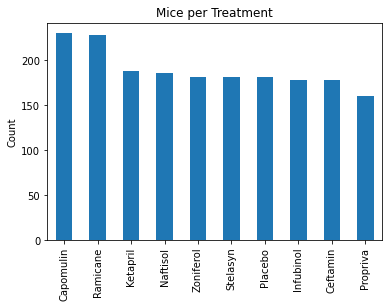

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     160
Name: Drug Regimen, dtype: int64

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# clean_df.groupby("Drug Regimen")["Mouse ID"].nunique().plot(kind="bar", title = "Mice per Treatment")

clean_df["Drug Regimen"].value_counts().plot.bar(title = "Mice per Treatment")
# clean_df["Drug Regimen"].value_counts().plot(kind="bar", title = "Mice per Treatment")
plt.ylabel("Count")
plt.show()
clean_df["Drug Regimen"].value_counts()

<AxesSubplot:xlabel='Drug Regimen'>

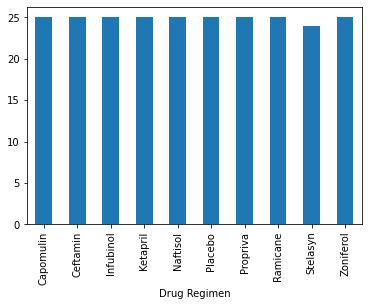

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment_name = (clean_df["Drug Regimen"].unique())

x = treatment_name
y = clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()
y.plot.bar(x, y)


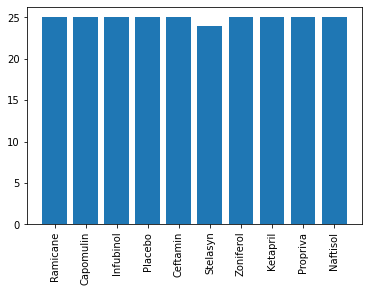

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment_name = (clean_df["Drug Regimen"].unique())

clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()
mouse_per_treatment=[]
for treatment in treatment_name:
    temp=clean_df.loc[clean_df["Drug Regimen"]==treatment]
    mouse_per_treatment.append(len(np.unique(temp["Mouse ID"])))
mouse_per_treatment
x = treatment_name
y = mouse_per_treatment
plt.bar(x, y)
plt.xticks(rotation = "vertical")
plt.show()

In [11]:
len(combined_df["Mouse ID"].unique())

249

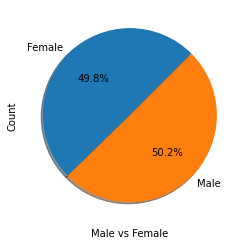

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df.groupby("Sex")["Mouse ID"].nunique().plot(kind="pie", autopct='%1.1f%%', shadow=True, startangle=45)
plt.xlabel("Male vs Female")
plt.ylabel("Count")

plt.show()


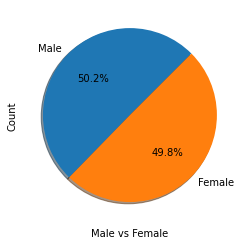

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
treatment_name = (clean_df["Sex"].unique())


mouse_per_treatment=[]
for treatment in treatment_name:
    temp=clean_df.loc[clean_df["Sex"]==treatment]
    mouse_per_treatment.append(len(np.unique(temp["Mouse ID"])))
    
fig = plt.figure()
plt.pie(mouse_per_treatment, labels = treatment_name, autopct='%1.1f%%', shadow=True, startangle=45)
plt.xlabel("Male vs Female")
plt.ylabel("Count")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin
select_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
deselcted_treatments = ["Ketapril", "Naftisol", "Placebo", "Propriva", "Stelasyn", "Zoniferol"]
max_time_regimen = clean_df[clean_df["Drug Regimen"] != "Ketapril"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Naftisol"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Placebo"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Propriva"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Stelasyn"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Zoniferol"]

# # Start by getting the last (greatest) timepoint for each mouse
max_time = max_time_regimen.groupby("Mouse ID", as_index=False)["Timepoint"].max()

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_time = clean_df.merge(max_time)
merge_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

select_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
quantile = []
tumor_vol = []
lower_q_total = []
upper_q_total = []
iqr_total = []
lower_bound_total = []
upper_bound_total = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# First quartile (Q1) 
for treatment in select_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = merge_time.loc[merge_time["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(final_volume)
    
    # Determine outliers using upper and lower bounds
    quantile =final_volume.quantile([.25, .5, .75])
    lower_q = quantile[.25]
    upper_q = quantile[.75]
    iqr = upper_q - lower_q
    lower_out = lower_q-(1.5*iqr)
    higher_out = upper_q+(1.5*iqr)
    outliers = final_volume.loc[(final_volume < lower_out) | (final_volume > higher_out)]
    print(f"{treatment}'s potential outliers: {outliers}")
 


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [16]:
Tumor_vol_reg = merge_time.loc[merge_time["Drug Regimen"] == "Ceftamin","Tumor Volume (mm3)"].quantile([.25, .5, .75])

<AxesSubplot:>

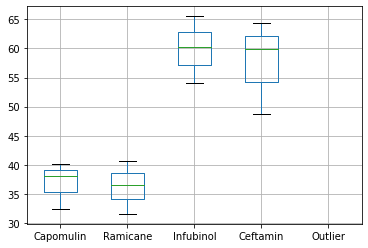

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
max_time_regimen = clean_df[clean_df["Drug Regimen"] != "Ketapril"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Naftisol"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Placebo"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Propriva"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Stelasyn"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Zoniferol"]
max_time_Capomulin = merge_time.loc[merge_time["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"].quantile([.25, .5, .75])
max_time_Ramicane = merge_time.loc[merge_time["Drug Regimen"] == "Ramicane","Tumor Volume (mm3)"].quantile([.25, .5, .75])
max_time_Infubinol = merge_time.loc[merge_time["Drug Regimen"] == "Infubinol","Tumor Volume (mm3)"].quantile([.25, .5, .75])
max_time_Ceftamin = merge_time.loc[merge_time["Drug Regimen"] == "Ceftamin","Tumor Volume (mm3)"].quantile([.25, .5, .75])
final_volume_df = pd.DataFrame ({"Capomulin": max_time_Capomulin,
                                 "Ramicane": max_time_Ramicane,
                                 "Infubinol": max_time_Infubinol,
                                 "Ceftamin": max_time_Ceftamin,
                                 "Outlier": outliers
                                })
final_volume_df.boxplot()

## Line and Scatter Plots

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


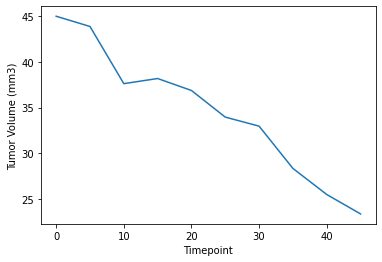

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

random_mouse = clean_df[(clean_df ==  "s185").any(1)]
x = random_mouse["Timepoint"]
y = random_mouse["Tumor Volume (mm3)"]

plt.plot(x,y)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
random_mouse

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


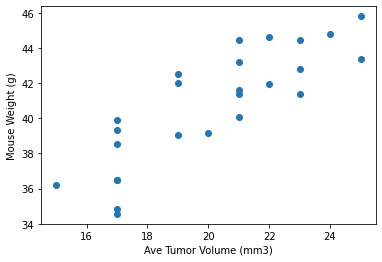

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = clean_df[(clean_df ==  "Capomulin").any(1)]

capomulin_tumor_ave = capomulin.groupby(capomulin["Mouse ID"])[["Tumor Volume (mm3)"]].mean()
capomulin_mouse_weight = capomulin.groupby(capomulin["Mouse ID"])[["Weight (g)"]].mean()
capomulin_weight_tumor_comb = capomulin.groupby(capomulin["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
capomulin_weight_tumor_comb_w = capomulin_weight_tumor_comb["Weight (g)"]
capomulin_weight_tumor_comb_t = capomulin_weight_tumor_comb["Tumor Volume (mm3)"]
# random_mouse = clean_df[(clean_df ==  "Capomulin").any(1)]

x = capomulin_mouse_weight
y = capomulin_tumor_ave

plt.scatter(x,y,)
plt.xlabel("Ave Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.show()

## Correlation and Regression

The Pearson correlation coefficient is 0.84


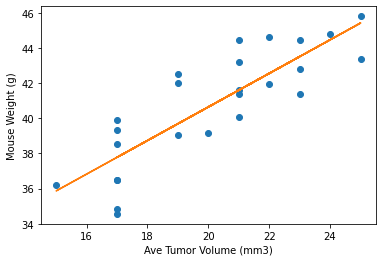

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x1 = capomulin_weight_tumor_comb_w
y1 = capomulin_weight_tumor_comb_t

plt.plot(x1,y1,"o")
plt.xlabel("Ave Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")

np.polyfit(x1,y1,1)
m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1 + b)
corr_coef = str(x1.corr(y1, method='pearson', min_periods=None).round(2))
print("The Pearson correlation coefficient is" + " "+ corr_coef)